In [1]:
import os
import networkx as nx
import numpy as np
import pandas as pd
import math
import pyflagser
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [245]:
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import scikitplot as skplt
import matplotlib.pyplot as plt

In [2]:
G=nx.read_gml("Fully Observable/37busEx.gml")

In [3]:
A = nx.to_numpy_array(G)
print(A)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [4]:
N=list(G.nodes)
print(N)
print(len(N))
E=list(G.edges)
print(E)
print(len(E))

['sourcebus', '799', '709', '775', '701', '702', '705', '713', '703', '727', '730', '704', '714', '720', '742', '712', '706', '725', '707', '724', '722', '708', '733', '732', '731', '710', '735', '736', '711', '741', '740', '718', '744', '734', '737', '738', '728', '729', '799r']
39
[('sourcebus', '799'), ('799', '799r'), ('709', '775'), ('709', '731'), ('709', '708'), ('709', '730'), ('701', '702'), ('701', '799r'), ('702', '705'), ('702', '713'), ('702', '703'), ('705', '742'), ('705', '712'), ('713', '704'), ('703', '727'), ('703', '730'), ('727', '744'), ('704', '714'), ('704', '720'), ('714', '718'), ('720', '707'), ('720', '706'), ('706', '725'), ('707', '724'), ('707', '722'), ('708', '733'), ('708', '732'), ('733', '734'), ('710', '735'), ('710', '736'), ('710', '734'), ('711', '741'), ('711', '740'), ('711', '738'), ('744', '728'), ('744', '729'), ('734', '737'), ('737', '738')]
38


In [5]:
import pickle
with open('Fully Observable/fullanomalydataset.pkl', 'rb') as g:
    P0Data = pickle.load(g)

In [87]:
Class=[]
for i in range(len(P0Data)):
    Class.append(P0Data[i]["Anomalous"])
print(len(Class))
i=0
l=0
m=0
while i < len(Class):
    if Class[i] == 'No':
        l=l+1
        Class[i] = 0
    if Class[i] == 'Yes':
        m=m+1
        Class[i] = 1
    i += 1
#print(Class)
print(l)
print(m)

500
249
251


In [163]:
Class=[]
for i in range(300):
    Class.append(P0Data[i]["Anomalous"])
#print(len(Class))
i=0
l=0
m=0
while i < 300:
    if Class[i] == 'No':
        l=l+1
        Class[i] = 0
    if Class[i] == 'Yes':
        m=m+1
        Class[i] = 1
    i += 1
#print(Class)
print(l)
print(m)

147
153


In [96]:
TimeSeries_Voltage=P0Data[0]["TimeSeries_Voltage"]
Voltage=TimeSeries_Voltage[14]
print(Voltage)

[[0.99998686 0.99999079 0.99999042]
 [0.87192787 1.02538894 0.9047761 ]
 [0.95160214 0.99996209 0.98502023]
 [0.95159902 0.9998859  0.98510055]
 [0.97499465 1.01557534 1.00147092]
 [0.96683179 1.00988603 0.99450443]
 [0.96599417 1.00898968 0.99295299]
 [0.96536794 1.00831951 0.99250947]
 [0.95915255 1.00484379 0.98984144]
 [0.95797087 1.00398043 0.98914336]
 [0.95331999 1.00118246 0.98607578]
 [0.96388736 1.00605677 0.99018416]
 [0.96369653 1.00585328 0.99015538]
 [0.96256558 1.00380462 0.98677183]
 [0.96591493 1.00827245 0.99238648]
 [0.96555106 1.00898971 0.99244696]
 [0.96255058 1.0034893  0.98644274]
 [0.96254297 1.00320026 0.98620298]
 [0.96204838 0.99966993 0.98288278]
 [0.9620278  0.99888216 0.98222989]
 [0.96198407 0.99925505 0.98247892]
 [0.94887048 0.99834591 0.98369168]
 [0.94633399 0.99672996 0.98254048]
 [0.94857746 0.99834596 0.98334578]
 [0.95157019 0.99933152 0.98434535]
 [0.94145926 0.99396747 0.97892796]
 [0.94108519 0.99396749 0.97849851]
 [0.94142486 0.99263763 0.97

In [105]:
def Average(lst):
    return sum(lst) / len(lst)
AverageVoltage=[]
TimeSeries_Voltage=P0Data[90]["TimeSeries_Voltage"]
Voltage=TimeSeries_Voltage[3]
for y in Voltage:
    AverageVoltage.append(Average(list(y)))
AverageVoltage = [i*100  for i in AverageVoltage]
print(AverageVoltage)

[99.99918655350018, 94.97528645170078, 100.48718428495205, 100.48722895971846, 101.93380453230286, 101.39043713080433, 101.30437452358282, 101.2587670760877, 100.93741437098235, 100.86670135445557, 100.5910429546092, 101.09907270557876, 101.08772161996298, 100.91648947060436, 101.26796940922331, 101.28003368029555, 100.89950363462756, 100.88567880138521, 100.69082899932135, 100.65173080601187, 100.66756941665432, 100.3400588150502, 100.20244345552418, 100.32372465162827, 100.45146366443822, 99.91112899304918, 99.8905437629429, 99.84505991556696, 99.72325158026872, 99.71159287126066, 99.70262835975987, 101.03710208964738, 100.82813724380159, 99.99144750954106, 99.82642618325058, 99.75877300334236, 100.79853938477348, 100.81466778538928, 102.94588816599229]


In [38]:
N_Senario=len(P0Data)
print(N_Senario)

500


In [159]:
def Make_Sum(Array):
    one_dim_array = []

    # Iterate through each row of the 2D array
    for row in Array:
        # Iterate through each element of the row
        for i, element in enumerate(row):
            # If the one-dimensional array is not large enough, extend it
            if len(one_dim_array) <= i:
                one_dim_array.append(element)
            else:
                # Add the element to the corresponding index of the one-dimensional array
                one_dim_array[i] += element
    return one_dim_array

In [218]:
def TimeSeries_Fe(TS_voltage, TS_branchFlow, F_voltage,F_Flow):
    betti_0=[]
    for k in range(len(TS_voltage)):
        fec=[]
        AverageVoltage=[]
        Voltage=TS_voltage[k]
        for y in Voltage:
            AverageVoltage.append(Average(list(y)))
        #AverageVoltage = [i * 100 for i in AverageVoltage]
        BranchFlow=[]
        Branch_Flow=TS_branchFlow[k]
        for j  in range(len(Branch_Flow)):
            BranchFlow.append(Branch_Flow[j][0])

        for p in range(len(F_voltage)):
            Active_node_v=np.where(np.array(AverageVoltage) > F_voltage[p])[0].tolist()
            for q in range(len(F_Flow)):
                #if AverageVoltage[p]> F_voltage[p] and BranchFlow[q]> F_Flow[q]:
                #n_active = np.where(np.array(AverageVoltage) > F_voltage[p])[0].tolist()
                n_active=Active_node_v.copy()
                #print(n_active)
                G = nx.DiGraph()
                G.add_nodes_from(n_active)
                indices = np.where(np.array(BranchFlow) > F_Flow[q])[0].tolist()
                for s in indices:
                    a=int(N.index(E[s][0]))
                    b=int(N.index(E[s][1]))
                    if a in n_active and b in n_active:
                        G.add_edge(a, b)
                    #n_active.append(int(N.index(E[s][0])))
                    #n_active.append(int(N.index(E[s][1])))
                #Active_node=np.unique(n_active)
                #print(G.edges())
                if (len(n_active)==0):
                    fec.append(0)
                else:
                    #b=A[Active_node,:][:,Active_node]
                    Adj = nx.to_numpy_array(G)
                    my_flag=pyflagser.flagser_unweighted(Adj, min_dimension=0, max_dimension=2, directed=False, coeff=2, approximation=None)
                    x = my_flag["betti"]
                    fec.append(x[0])
                n_active.clear()
            Active_node_v.clear()
        betti_0.append(fec)
    return betti_0

TimeSeries_Voltage=P0Data[0]["TimeSeries_Voltage"]
TimeSeries_Branch_Flow=P0Data[0]["BranchFlow"]
betti=TimeSeries_Fe(TimeSeries_Voltage,TimeSeries_Branch_Flow, F_voltage,F_Flow)


In [221]:
F_Flow=[100,90,75,50,25,10,5,0]
F_voltage=[1.4,1.3,1.2,1.1,1.0,0.99,0.98,0.97,0.96,0.95,0.94,0.92,0.90,0.89,0.88,0.87,0.86,0.85]
Betti_0=[]
#N_Senario=len(P0Data)
N_Senario=300
for i in range(N_Senario):
    print("\rProcessing file {} ({}%)".format(i, 100*i//(N_Senario-1)), end='', flush=True)
    TimeSeries_Voltage=P0Data[i]["TimeSeries_Voltage"]
    TimeSeries_Branch_Flow=P0Data[i]["BranchFlow"]
    betti=TimeSeries_Fe(TimeSeries_Voltage,TimeSeries_Branch_Flow, F_voltage,F_Flow)
    #Betti_0.append(betti)
    Betti=Make_Sum(betti)
    Betti_0.append(Betti)

Processing file 299 (100%)

In [223]:
Vol_fec =np.array(Betti_0)
n=len(Betti_0[0])

Feture=[]
for i in range(n):
    Feture.append("{}".format(i))

Vdata = pd.DataFrame(Vol_fec, columns =Feture) 
Vdata.insert(loc=n,column='Class',value=Class)
Vdata.tail()

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,Class
295,0,0,0,0,0,0,0,0,0,0,...,25,862,848,810,727,604,346,156,25,1
296,0,0,0,0,0,0,0,0,0,0,...,24,802,780,742,669,534,264,76,24,1
297,0,0,0,0,0,0,0,0,0,0,...,24,851,830,795,708,590,321,142,24,1
298,0,0,0,0,0,0,0,0,0,0,...,24,810,792,753,675,544,283,101,24,0
299,0,0,0,0,0,0,0,0,0,0,...,24,866,851,812,729,605,349,164,24,0


In [224]:
X=Betti_0
y=Class
X=np.array(X)
y=np.array(y)

In [248]:
# Define the K-fold Cross Validator
num_folds=10
kfold = KFold(n_splits=num_folds, shuffle=True)

acc_per_fold=[]
fold_no = 1
for train, test in kfold.split(X, y):
    bst = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1,booster='gbtree')

    # Train the model
    bst.fit(X[train], y[train])
    # Evaluate the model
    y_pred=bst.predict(X[test])
    #Import scikit-learn metrics module for accuracy calculation
    
    #skplt.metrics.plot_confusion_matrix(y[test], y_pred)
    #skplt.metrics.plot_roc(y_test, predicted_probas)
    #skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
    #plt.show()
    # Model Accuracy, how often is the classifier correct?
    acc=metrics.accuracy_score(y[test], y_pred)*100
    print("Accuracy:",acc,"%")
    acc_per_fold.append(acc)

      # Increase fold number
    fold_no = fold_no + 1

Accuracy: 90.0 %
Accuracy: 76.66666666666667 %
Accuracy: 86.66666666666667 %
Accuracy: 100.0 %
Accuracy: 80.0 %
Accuracy: 93.33333333333333 %
Accuracy: 93.33333333333333 %
Accuracy: 90.0 %
Accuracy: 83.33333333333334 %
Accuracy: 70.0 %


In [249]:
mean_value = statistics.mean(acc_per_fold)
std_dev = statistics.stdev(acc_per_fold)
print("Mean using XGBoost:", mean_value)
print("Standard Deviation:", std_dev)

Mean using XGBoost: 86.33333333333333
Standard Deviation: 8.951170693832367


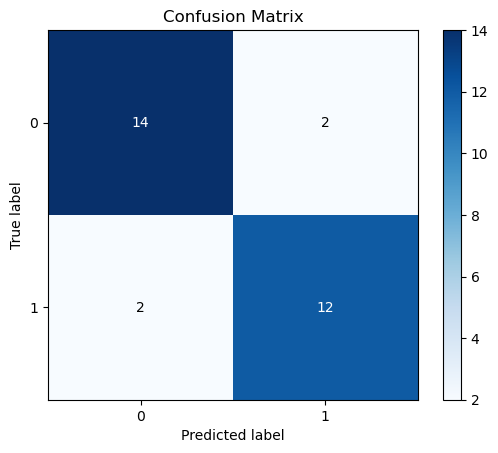

Accuracy: 86.66666666666667 %


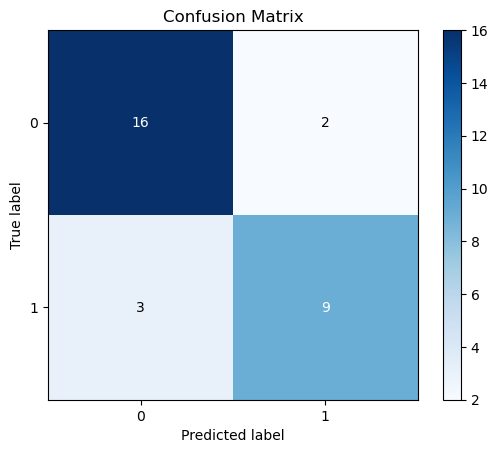

Accuracy: 83.33333333333334 %


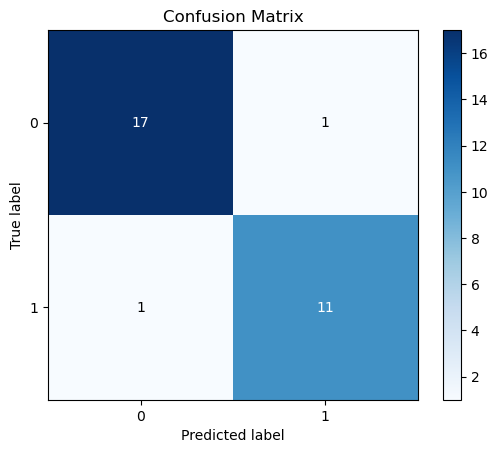

Accuracy: 93.33333333333333 %


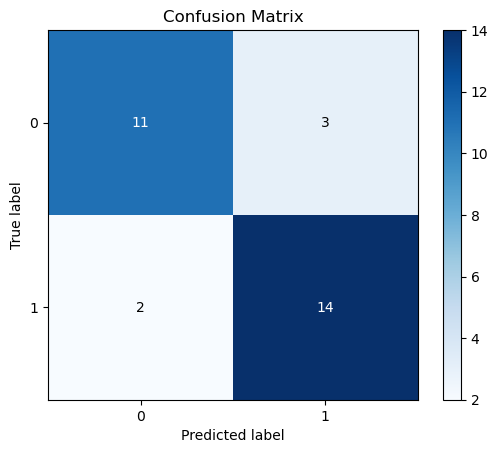

Accuracy: 83.33333333333334 %


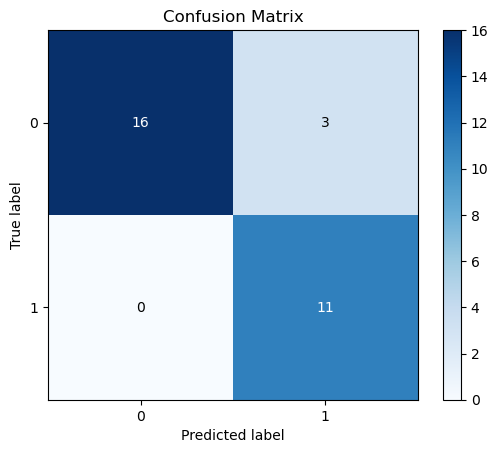

Accuracy: 90.0 %


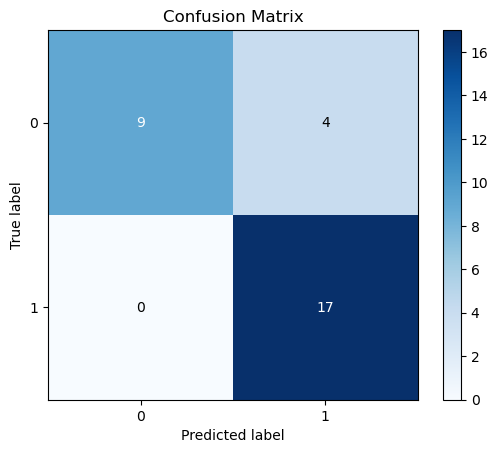

Accuracy: 86.66666666666667 %


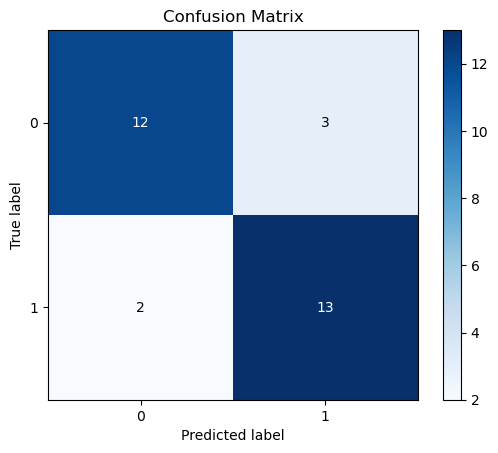

Accuracy: 83.33333333333334 %


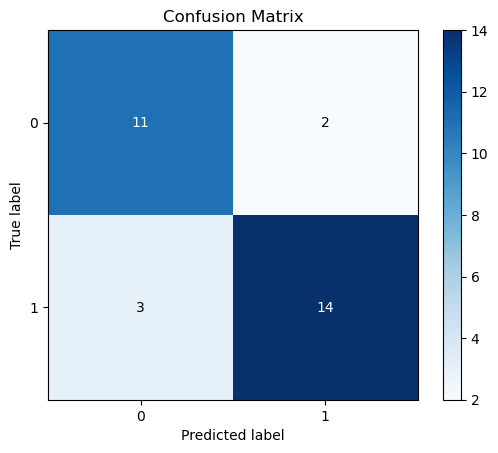

Accuracy: 83.33333333333334 %


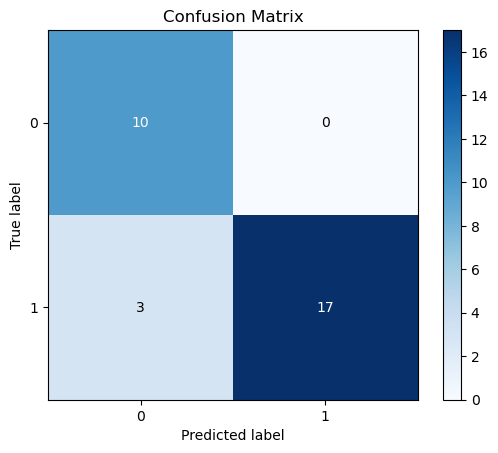

Accuracy: 90.0 %


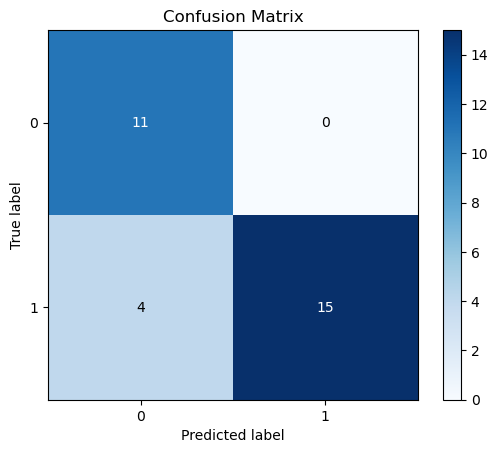

Accuracy: 86.66666666666667 %


In [250]:
# Define the K-fold Cross Validator
from sklearn.preprocessing import MinMaxScaler
num_folds=10
kfold = KFold(n_splits=num_folds, shuffle=True)

acc_per_fold=[]
fold_no = 1
for train, test in kfold.split(X, y):

    #scaler = StandardScaler()  
    # Don't cheat - fit only on training data
    #scaler.fit(X)  
    scaler = MinMaxScaler()

# Fit scaler to data and transform data
    X=scaler.fit_transform(X)
    #X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    #X_test = scaler.transform(X_test)  


    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(200,),activation='logistic', learning_rate='constant', learning_rate_init=0.1, random_state=1, max_iter=3000, warm_start=True)
    clf.fit(X[train], y[train])
    # Evaluate the model
    y_pred=clf.predict(X[test])



    skplt.metrics.plot_confusion_matrix(y[test], y_pred)
    #skplt.metrics.plot_roc(y_test, predicted_probas)
    #skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
    plt.show()
    # Model Accuracy, how often is the classifier correct?
    acc=metrics.accuracy_score(y[test], y_pred)*100
    print("Accuracy:",acc,"%")
    acc_per_fold.append(acc)

      # Increase fold number
    fold_no = fold_no + 1

In [251]:
mean_value = statistics.mean(acc_per_fold)
std_dev = statistics.stdev(acc_per_fold)
print("Mean using XGBoost:", mean_value)
print("Standard Deviation:", std_dev)

Mean using XGBoost: 86.66666666666667
Standard Deviation: 3.5136418446315276


In [282]:
from sklearn.ensemble import RandomForestClassifier
# Define the K-fold Cross Validator
num_folds=10
kfold = KFold(n_splits=num_folds, shuffle=True)

acc_per_fold=[]
fold_no = 1
for train, test in kfold.split(X, y):
    clfR=RandomForestClassifier(n_estimators=200,max_depth=20,bootstrap=True)

    # Train the model
    clfR.fit(X[train], y[train])
    # Evaluate the model
    y_pred=clfR.predict(X[test])
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    # Model Accuracy, how often is the classifier correct?
    acc=metrics.accuracy_score(y[test], y_pred)*100
    print("Accuracy:",acc,"%")
    acc_per_fold.append(acc)

      # Increase fold number
    fold_no = fold_no + 1

Accuracy: 90.0 %
Accuracy: 86.66666666666667 %
Accuracy: 93.33333333333333 %
Accuracy: 76.66666666666667 %
Accuracy: 86.66666666666667 %
Accuracy: 83.33333333333334 %
Accuracy: 86.66666666666667 %
Accuracy: 90.0 %
Accuracy: 83.33333333333334 %
Accuracy: 83.33333333333334 %


In [283]:
mean_value = statistics.mean(acc_per_fold)
std_dev = statistics.stdev(acc_per_fold)
print("Mean using XGBoost:", mean_value)
print("Standard Deviation:", std_dev)

Mean using XGBoost: 86.0
Standard Deviation: 4.661372658534003
